In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
# How many students are in the dataset?
print(df.shape[0])

1000


In [5]:
# How many columns are in the dataset?
print(df.shape[1])

8


In [6]:
# the names of the columns in the dataset
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


# Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [7]:
# check missing values
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [8]:
# check duplicates
print(df.duplicated().sum())

0


In [9]:
# check data types
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [10]:
# check unique values in each column
for col in df.columns:
    print(col, df[col].nunique())

gender 2
race/ethnicity 5
parental level of education 6
lunch 2
test preparation course 2
math score 81
reading score 72
writing score 77


In [11]:
# check descriptive statistics
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


### From above, we can get these information:
- Students generally perform better in reading and writing compared to math, as indicated by higher average and median scores in these subjects.
- The wide range of scores, from very low to perfect scores, suggests that there is significant variability in student performance across all three subjects.
- The consistency in standard deviations implies that the spread of scores is similar for math, reading, and writing, indicating that variability in performance is uniform across these areas.

In [12]:
# check the first 5 rows
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [20]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col + ": " + ", ".join(df[col].unique()))

gender: female, male
race/ethnicity: group B, group C, group A, group D, group E
parental level of education: bachelor's degree, some college, master's degree, associate's degree, high school, some high school
lunch: standard, free/reduced
test preparation course: none, completed


In [23]:
# use weighted average to calculate the total score
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = round(df['total_score'] / 3, 2)

# delete the total score column
df.drop('total_score', axis=1, inplace=True)
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   average_score  
0          72.67  
1          82.33  
2          92.67  
3          49.33  
4          76.33  


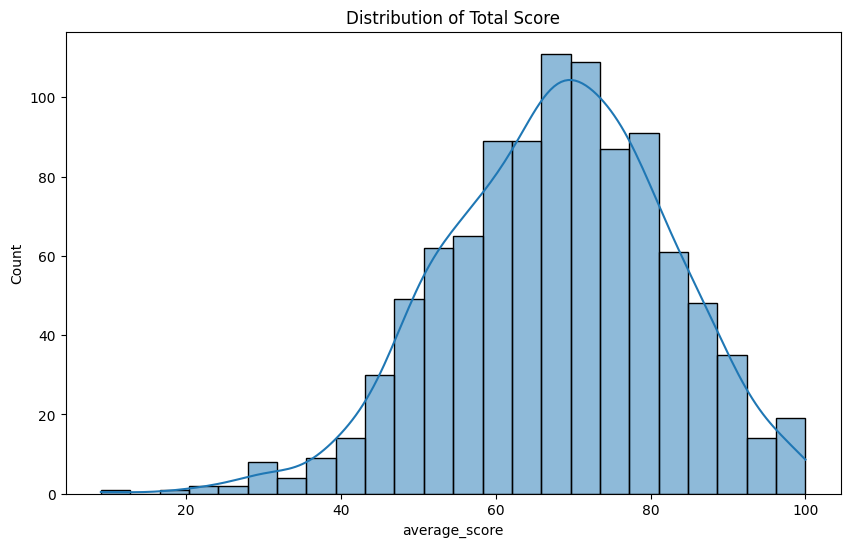

In [24]:
# explore the distribution of the average score
plt.figure(figsize=(10, 6))
sns.histplot(df['average_score'], kde=True)
plt.title('Distribution of Total Score')
plt.show()

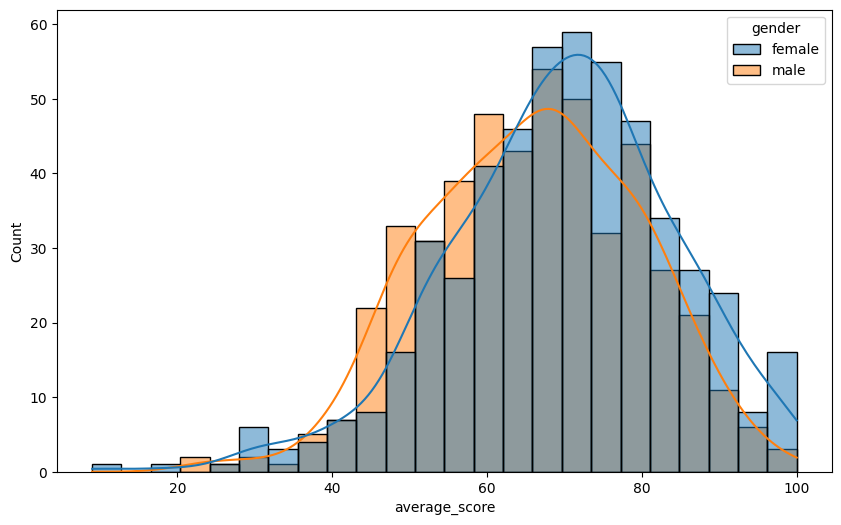

In [43]:
# explore the distribution of the average based on the gender, I want to use hisplot
plt.figure(figsize=(10, 6)) 
sns.histplot(df, x='average_score', kde=True, hue='gender')
plt.show() 

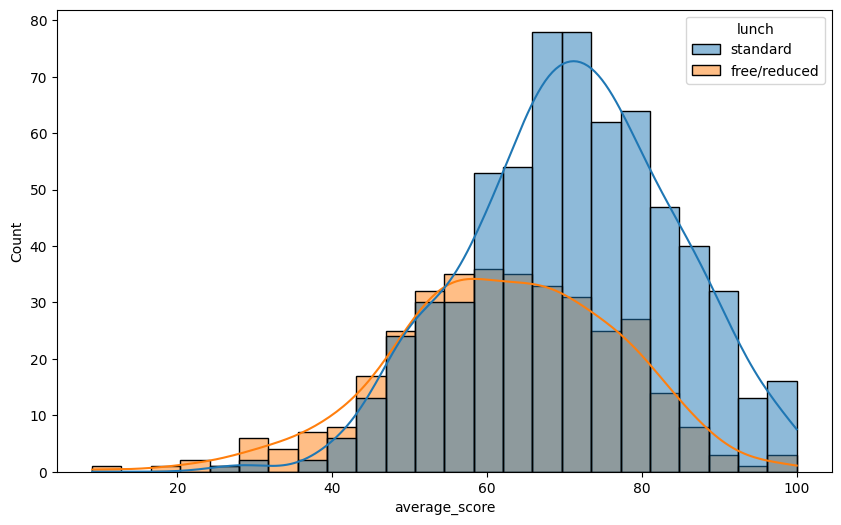

In [44]:
plt.figure(figsize=(10, 6)) 
sns.histplot(df, x='average_score', kde=True, hue='lunch')
plt.show()

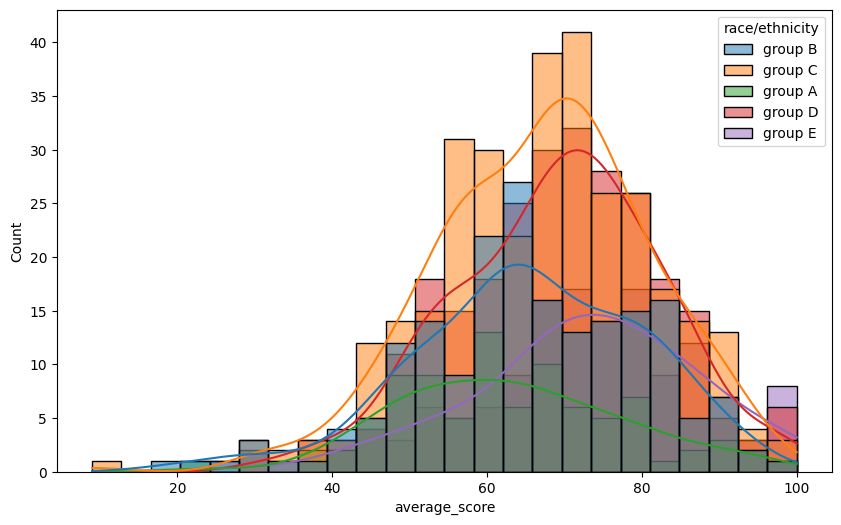

In [45]:
plt.figure(figsize=(10, 6)) 
sns.histplot(df, x='average_score', kde=True, hue='race/ethnicity')
plt.show()

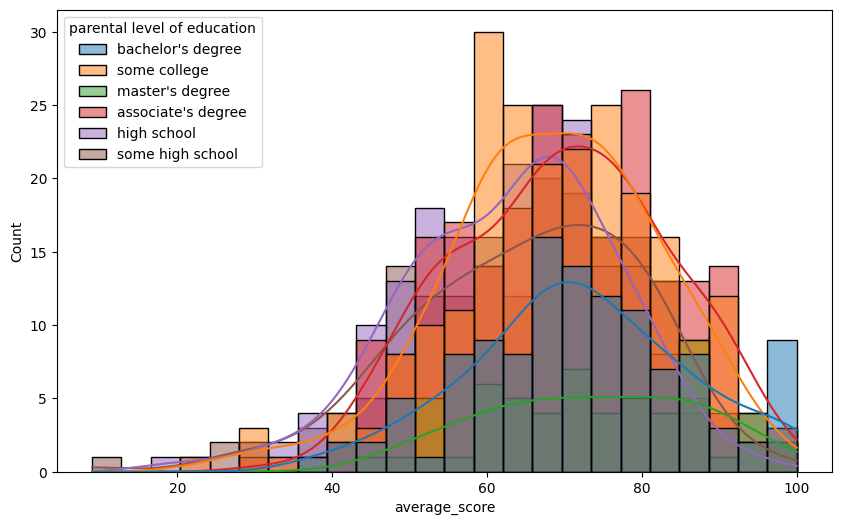

In [50]:
plt.figure(figsize=(10, 6)) 
sns.histplot(df, x='average_score', kde=True, hue='parental level of education')
plt.show()

Text(0.5, 1.0, 'Writing Score Distribution')

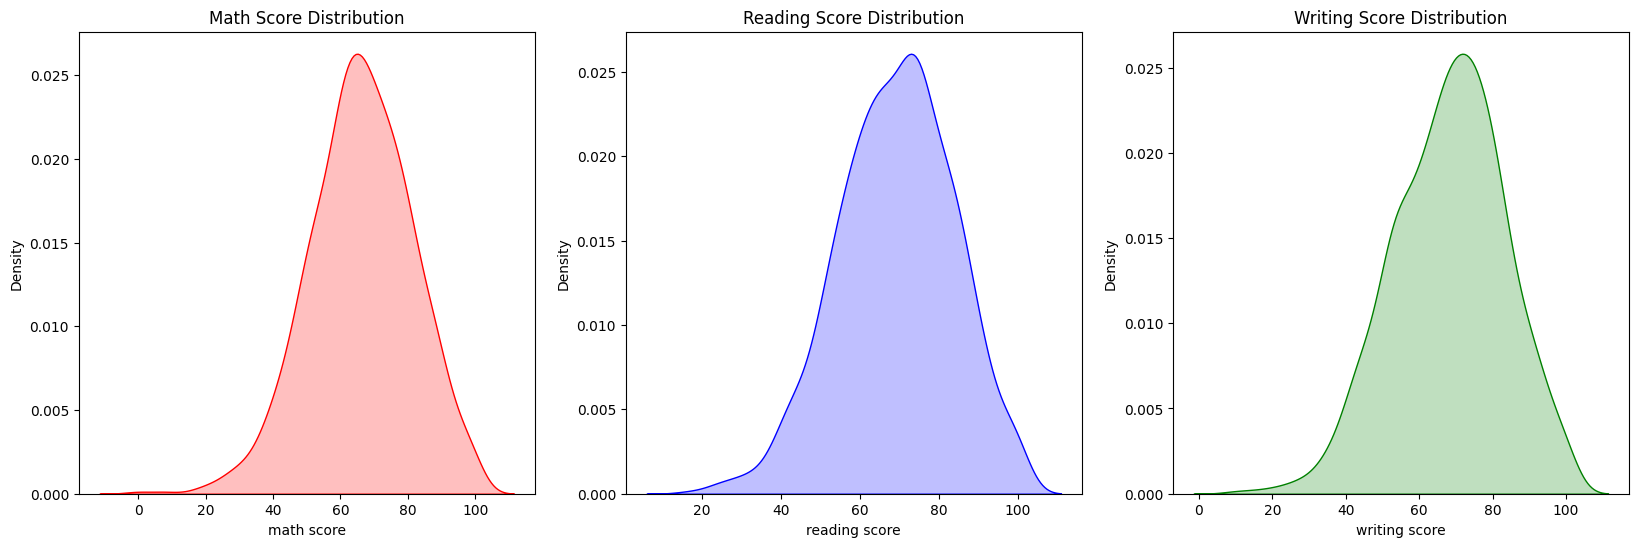

In [49]:
# plot the highest score of math score, reading score, and writing score with three subplots, do not use histplot, use sns.kdeplot
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.kdeplot(df['math score'], color='red', shade=True)
plt.title('Math Score Distribution')

plt.subplot(1, 3, 2)
sns.kdeplot(df['reading score'], color='blue', shade=True)
plt.title('Reading Score Distribution')

plt.subplot(1, 3, 3)
sns.kdeplot(df['writing score'], color='green', shade=True)
plt.title('Writing Score Distribution')



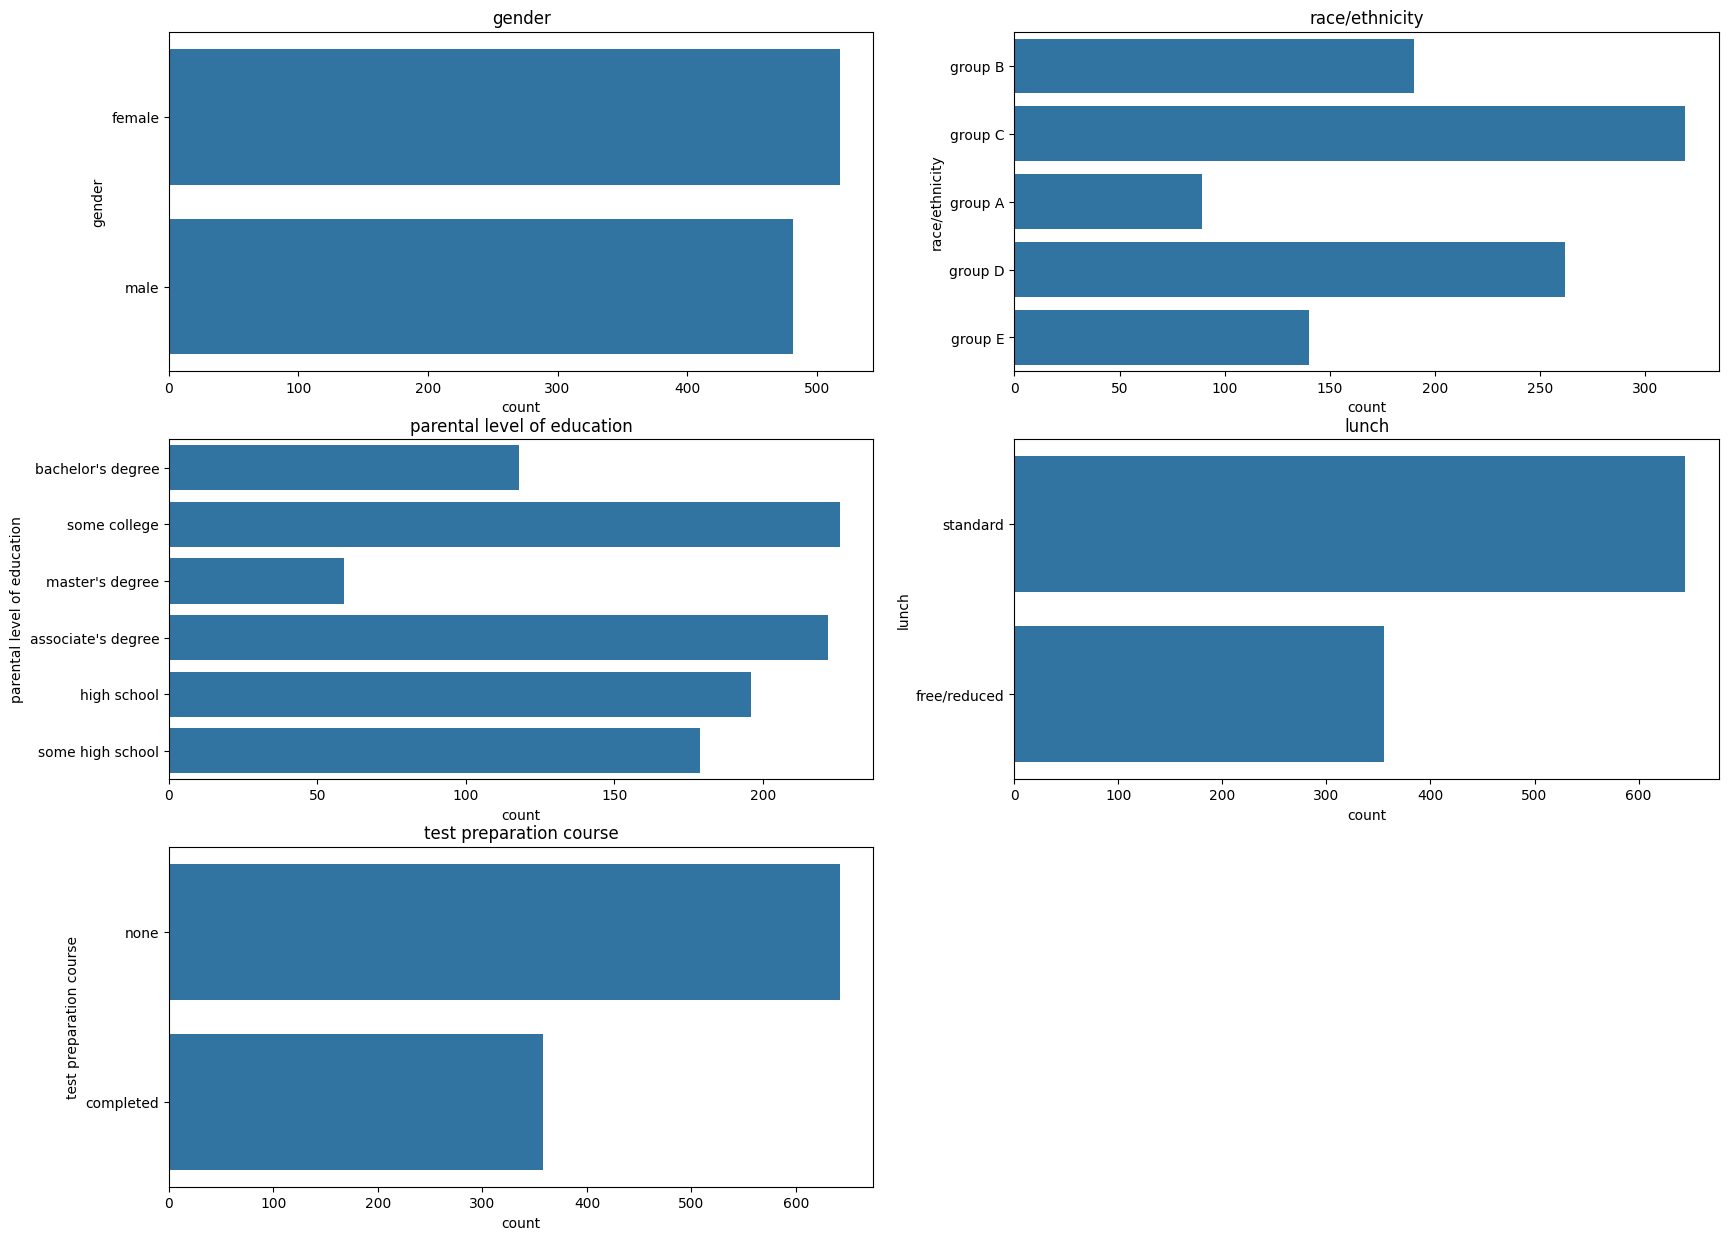

In [39]:
# plot the distribution if the column type is object, put all the subplots in one 3*2 figure, use histogram
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    if df[col].dtype == 'object':
        plt.subplot(3, 2, i+1)
        sns.countplot(df[col])
        plt.title(col)


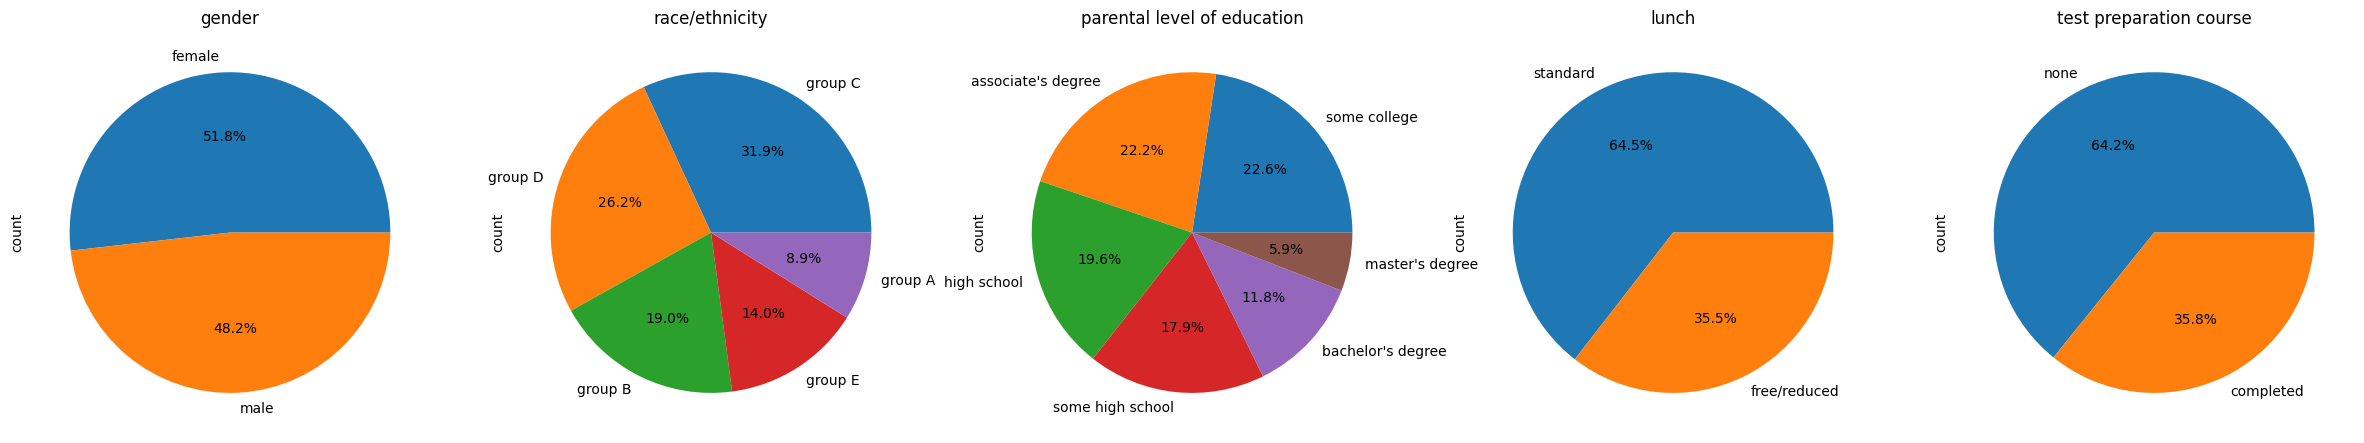

In [66]:
# create a pie chart to include all column's distrubution except numerical columns
# Get the non-numerical columns
non_numerical_columns = df.select_dtypes(include=['object']).columns
num_cols = len(non_numerical_columns)
# Create a pie chart to show all non-numerical column in one row
plt.figure(figsize=(30, 15))
for i, col in enumerate(non_numerical_columns):
    plt.subplot(1, num_cols, i+1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(col)

- Number of female and male is almost equal
- Number students are greatest in Group C
- Number of students who have standard are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is 'Some College' is greater followed closely by 'Associate Degree'

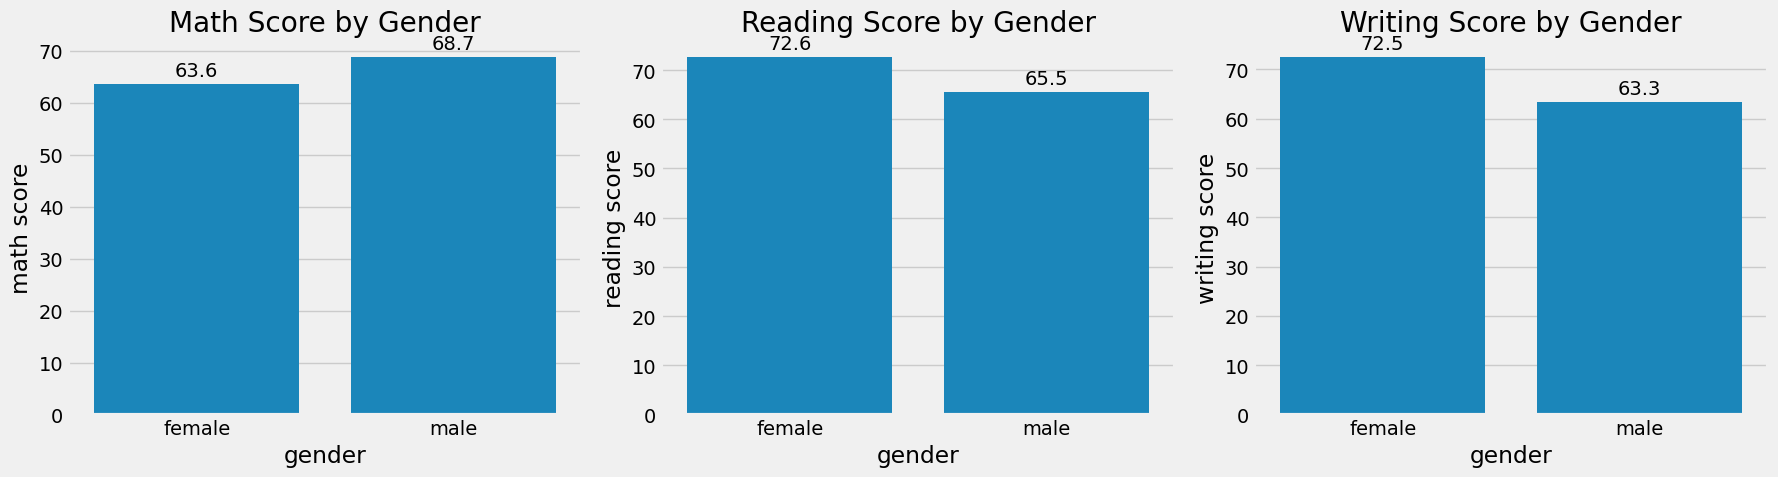

In [110]:
# use visualization to see if gender has any impact on student's performance
plt.figure(figsize=(18, 5))

# Math Score
plt.subplot(1, 3, 1)
sns.barplot(x='gender', y='math score', data=df,ci=None)
plt.title('Math Score by Gender')

for rect in plt.gca().patches:
        height = rect.get_height()
        plt.gca().annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                           textcoords="offset points", ha='center', va='bottom')

# Reading Score
plt.subplot(1, 3, 2)
sns.barplot(x='gender', y='reading score', data=df, ci=None)
plt.title('Reading Score by Gender')

for rect in plt.gca().patches:
        height = rect.get_height()
        plt.gca().annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                           textcoords="offset points", ha='center', va='bottom')

# Writing Score
plt.subplot(1, 3, 3)
sns.barplot(x='gender', y='writing score', data=df, ci=None)
plt.title('Writing Score by Gender')

for rect in plt.gca().patches:
        height = rect.get_height()
        plt.gca().annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                           textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

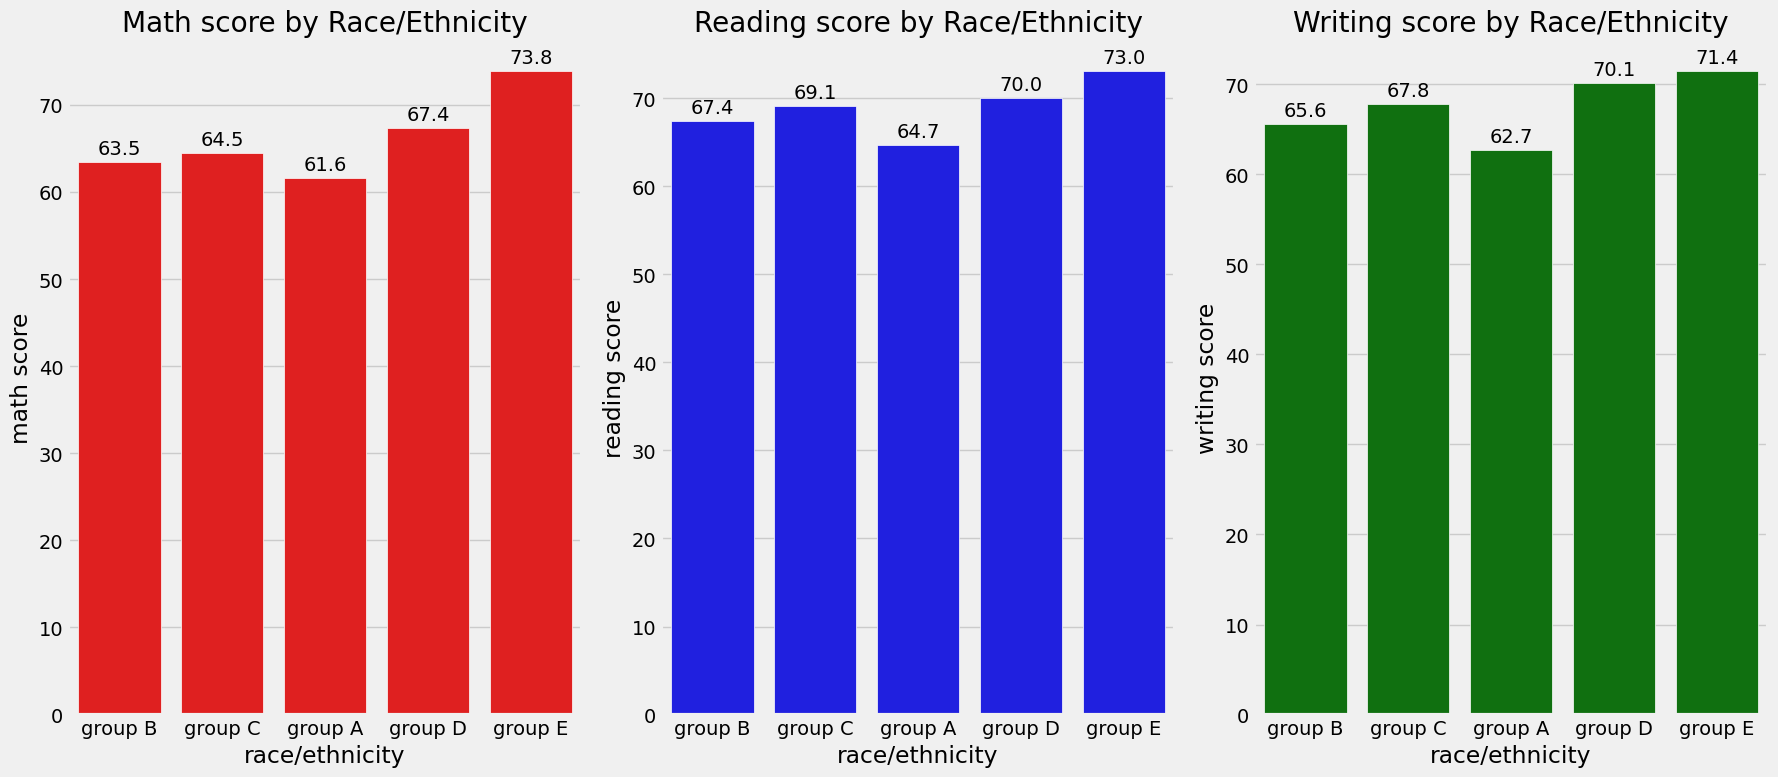

In [94]:

color = ['red', 'blue', 'green']  # Define the color variable


plt.figure(figsize=(18, 8))

# use visualization different scores based on the race in reading, writing, and math
for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='race/ethnicity', y=col, data=df, color=color[i], ci=None)  # Use the defined color variable
    plt.title(col.capitalize() + ' by Race/Ethnicity')
    
    # Remove the black lines in the middle of each column
    for container in plt.gca().containers:
        for bar in container:
            plt.setp(bar, edgecolor='white')
    
    # Add number of scores above each bar
    for rect in plt.gca().patches:
        height = rect.get_height()
        plt.gca().annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                           textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()



        

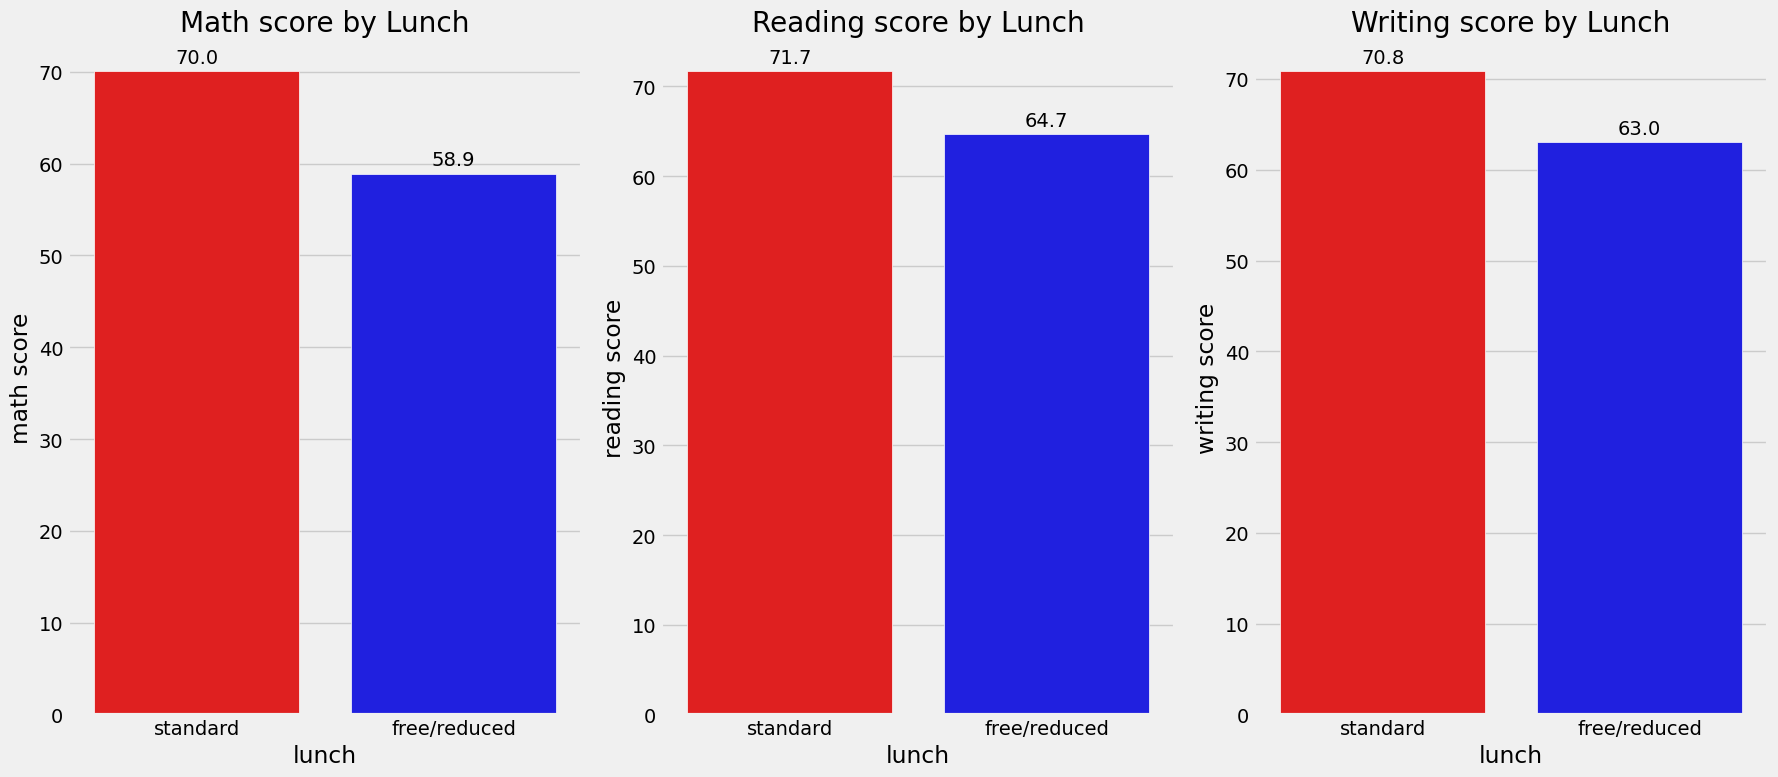

In [95]:
plt.figure(figsize=(18, 8))

# use visualization to see if lunch has any impact on student's performance in math, reading, and writing
for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='lunch', y=col, data=df, ci=None, palette=color)
    plt.title(col.capitalize() + ' by Lunch')

    # Remove the black lines in the middle of each column
    for container in plt.gca().containers:
        for bar in container:
            plt.setp(bar, edgecolor='white')

    # Add number of scores above each bar
    for rect in plt.gca().patches:
        height = rect.get_height()
        plt.gca().annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                           textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()




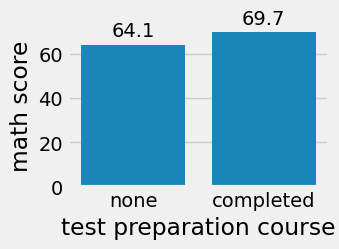

In [107]:
plt.figure(figsize=(3, 2))
sns.barplot(x='test preparation course', y='math score', data=df, ci=None)

for rect in plt.gca().patches:
        height = rect.get_height()
        plt.gca().annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                           textcoords="offset points", ha='center', va='bottom')

plt.show()

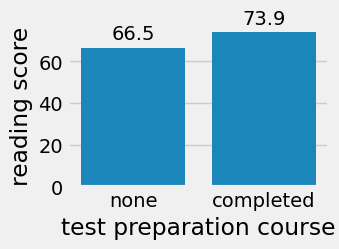

In [108]:
plt.figure(figsize=(3, 2))
sns.barplot(x='test preparation course', y='reading score', data=df, ci=None)

for rect in plt.gca().patches:
        height = rect.get_height()
        plt.gca().annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                           textcoords="offset points", ha='center', va='bottom')

plt.show()

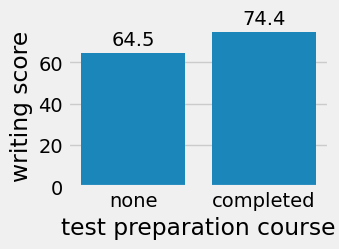

In [109]:
plt.figure(figsize=(3, 2))
sns.barplot(x='test preparation course', y='writing score', data=df, ci=None)
for rect in plt.gca().patches:
        height = rect.get_height()
        plt.gca().annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                           textcoords="offset points", ha='center', va='bottom')
plt.show()

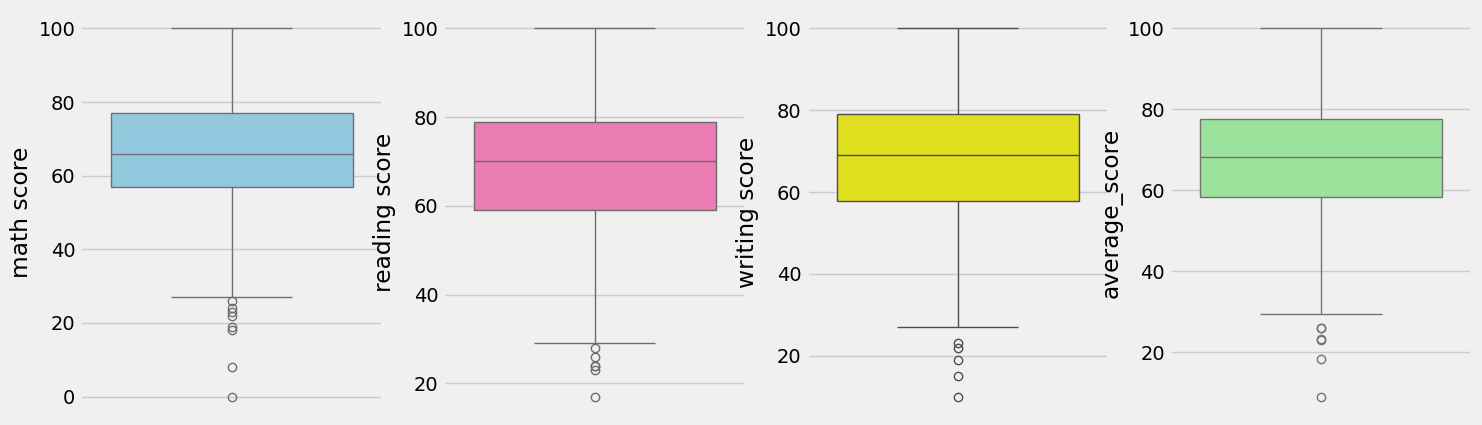

In [112]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

- Student's Performance is comparatively more closely related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.